<a href="https://colab.research.google.com/github/sarab421/Linear-Regression/blob/main/Car_Fuel_Combustion_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
145,2014,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,E,18.4,12.2,15.6,18,250
713,2014,MAZDA,MAZDA5,MINIVAN,2.5,4,AS5,X,10.8,8.4,9.7,29,223
137,2014,BMW,Z4 sDRIVE35i,TWO-SEATER,3.0,6,AM7,Z,13.7,10.1,12.1,23,278
646,2014,LAND ROVER,RANGE ROVER SPORT V8 5.0 SC,SUV - STANDARD,5.0,8,AS8,Z,17.3,12.2,15.0,19,345
516,2014,HYUNDAI,SONATA HYBRID LIMITED,MID-SIZE,2.4,4,AS6,X,6.6,5.9,6.3,45,145


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [ ]:
cdf.sample(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
216,5.3,8,21.5,344
798,1.6,4,8.3,191
183,3.6,6,12.3,283
230,3.6,6,10.6,244
325,3.6,6,15.6,250
416,3.7,6,10.2,235
235,2.4,4,10.6,244
40,2.0,4,9.2,212
259,1.2,4,6.9,159
32,3.0,6,8.4,227


array([[<Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'ENGINESIZE'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

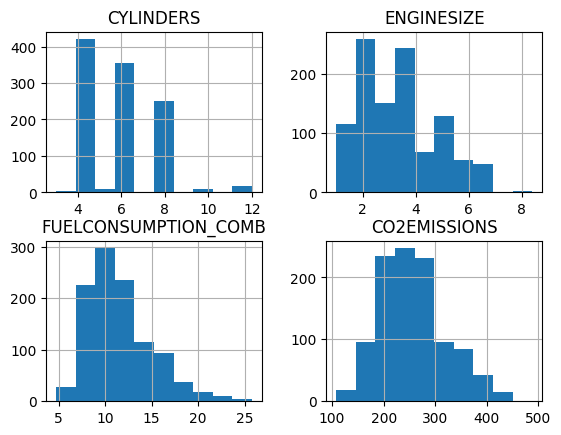

In [ ]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()

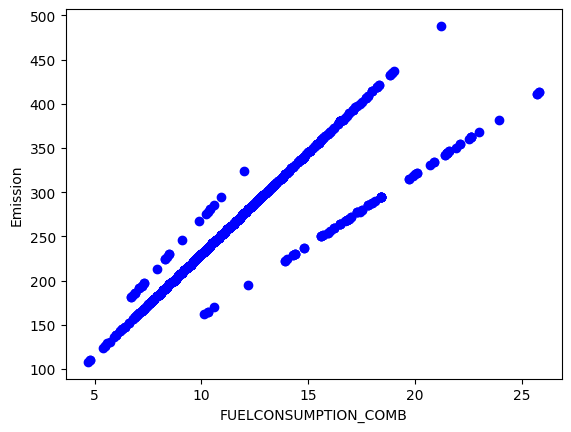

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

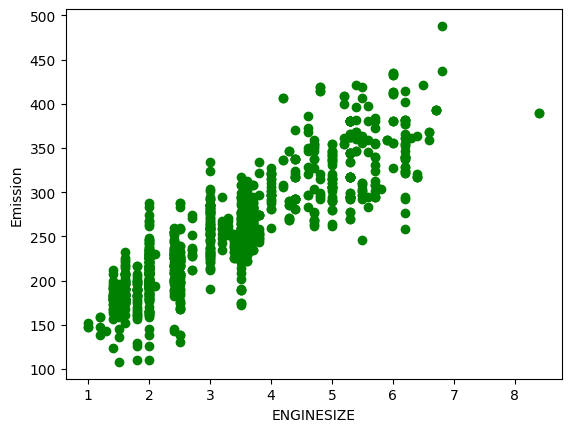

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

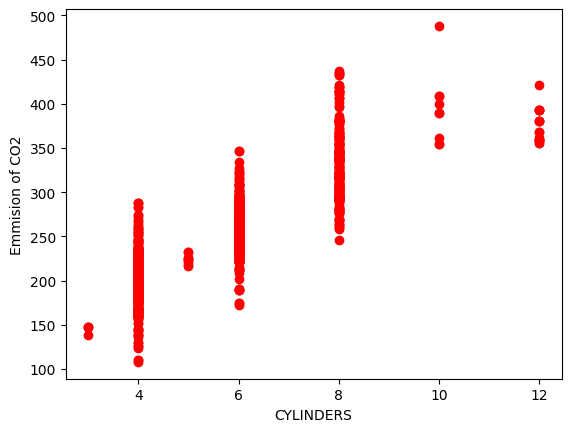

In [ ]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("Emmision of CO2")
plt.show()

# Engine Size and fuel consumption,  lets use them

In [ ]:
X = cdf[['ENGINESIZE', 'FUELCONSUMPTION_COMB']].to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853, 2), (853, 2))

## Now that training part

In [ ]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print ('Coefficients: ', regressor.coef_[0])
print ('Coefficients: ', regressor.coef_[1])
print ('Intercept: ',regressor.intercept_)

Coefficients:  19.592827232761064
Coefficients:  9.618439340589184
Intercept:  79.60512760457613


## Evaluating...............

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict( X_test)

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 17.03
Mean squared error: 543.58
Root mean squared error: 23.31
R2-score: 0.84
